<a href="https://colab.research.google.com/github/Raul9915/bank-fraud-detection/blob/main/02_exploracion_datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Importar librerias
import pandas as pd

In [3]:
# Definir la ruta
path = "/content/drive/MyDrive/bank-fraud-data/Comprehensive_Banking_Database_limpio.csv"
df = pd.read_csv(path)

df.shape, df.columns

((5000, 30),
 Index(['Age', 'Gender', 'City', 'Account Type', 'Account Balance',
        'Date Of Account Opening', 'Last Transaction Date', 'Transaction Date',
        'Transaction Type', 'Transaction Amount',
        'Account Balance After Transaction', 'Branch ID', 'Loan Amount',
        'Loan Type', 'Interest Rate', 'Loan Term', 'Approval/Rejection Date',
        'Loan Status', 'Card Type', 'Credit Limit', 'Credit Card Balance',
        'Minimum Payment Due', 'Payment Due Date',
        'Last Credit Card Payment Date', 'Rewards Points', 'Feedback Date',
        'Feedback Type', 'Resolution Status', 'Resolution Date', 'Anomaly'],
       dtype='object'))

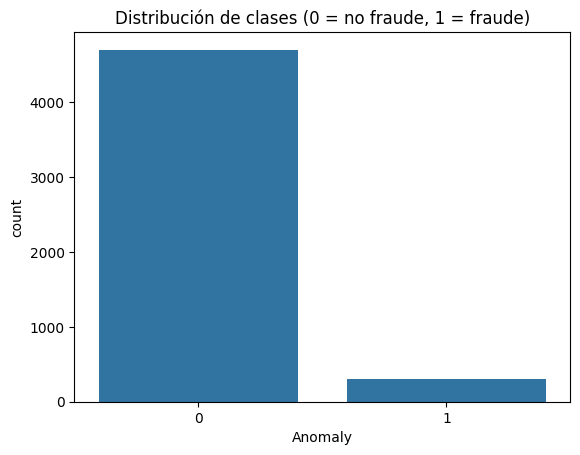

Anomaly
0    0.94
1    0.06
Name: proportion, dtype: float64


In [4]:
# Distribución de la variable objetivo (Anomaly)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Anomaly', data=df)
plt.title("Distribución de clases (0 = no fraude, 1 = fraude)")
plt.show()

print(df['Anomaly'].value_counts(normalize=True))

Este gráfico muestra un fuerte desbalance de clases: aproximadamente el 94% de las transacciones son normales (clase 0) y solo el 6% son fraudulentas (clase 1).  


In [5]:
# Estadísticas generales
df.describe(include='all')

,Age,Gender,City,Account Type,Account Balance,Date Of Account Opening,Last Transaction Date,Transaction Date,Transaction Type,Transaction Amount,...,Credit Card Balance,Minimum Payment Due,Payment Due Date,Last Credit Card Payment Date,Rewards Points,Feedback Date,Feedback Type,Resolution Status,Resolution Date,Anomaly
count,5000.000000,5000,5000,5000,5000.000000,5000,5000,5000,5000,5000.000000,...,5000.00000,5000.000000,5000,5000,5000.000000,5000,5000,5000,5000,5000.000000
unique,NaN,3,40,2,NaN,3738,365,365,3,NaN,...,NaN,NaN,365,365,NaN,365,3,2,365,NaN
top,NaN,Female,San Jose,Savings,NaN,2001-01-10,2023-01-23,2023-05-02,Deposit,NaN,...,NaN,NaN,2023-11-03,2023-01-14,NaN,2023-11-20,Suggestion,Pending,2023-09-06,NaN
freq,NaN,1727,163,2507,NaN,5,27,25,1698,NaN,...,NaN,NaN,28,24,NaN,29,1689,2504,27,NaN
mean,43.469800,NaN,NaN,NaN,5060.570918,NaN,NaN,NaN,NaN,2508.501144,...,2487.40084,124.370134,NaN,NaN,4966.161800,NaN,NaN,NaN,NaN,0.060000
std,15.145672,NaN,NaN,NaN,2849.356481,NaN,NaN,NaN,NaN,1450.194986,...,1446.80295,72.340102,NaN,NaN,2901.410915,NaN,NaN,NaN,NaN,0.237511
min,18.000000,NaN,NaN,NaN,107.200000,NaN,NaN,NaN,NaN,10.570000,...,1.45000,0.070000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,0.000000
25%,30.000000,NaN,NaN,NaN,2582.777500,NaN,NaN,NaN,NaN,1241.150000,...,1243.51750,62.180000,NaN,NaN,2475.250000,NaN,NaN,NaN,NaN,0.000000
50%,43.000000,NaN,NaN,NaN,5075.500000,NaN,NaN,NaN,NaN,2494.025000,...,2461.62000,123.080000,NaN,NaN,4950.500000,NaN,NaN,NaN,NaN,0.000000
75%,57.000000,NaN,NaN,NaN,7509.760000,NaN,NaN,NaN,NaN,3796.222500,...,3722.58000,186.125000,NaN,NaN,7483.250000,NaN,NaN,NaN,NaN,0.000000


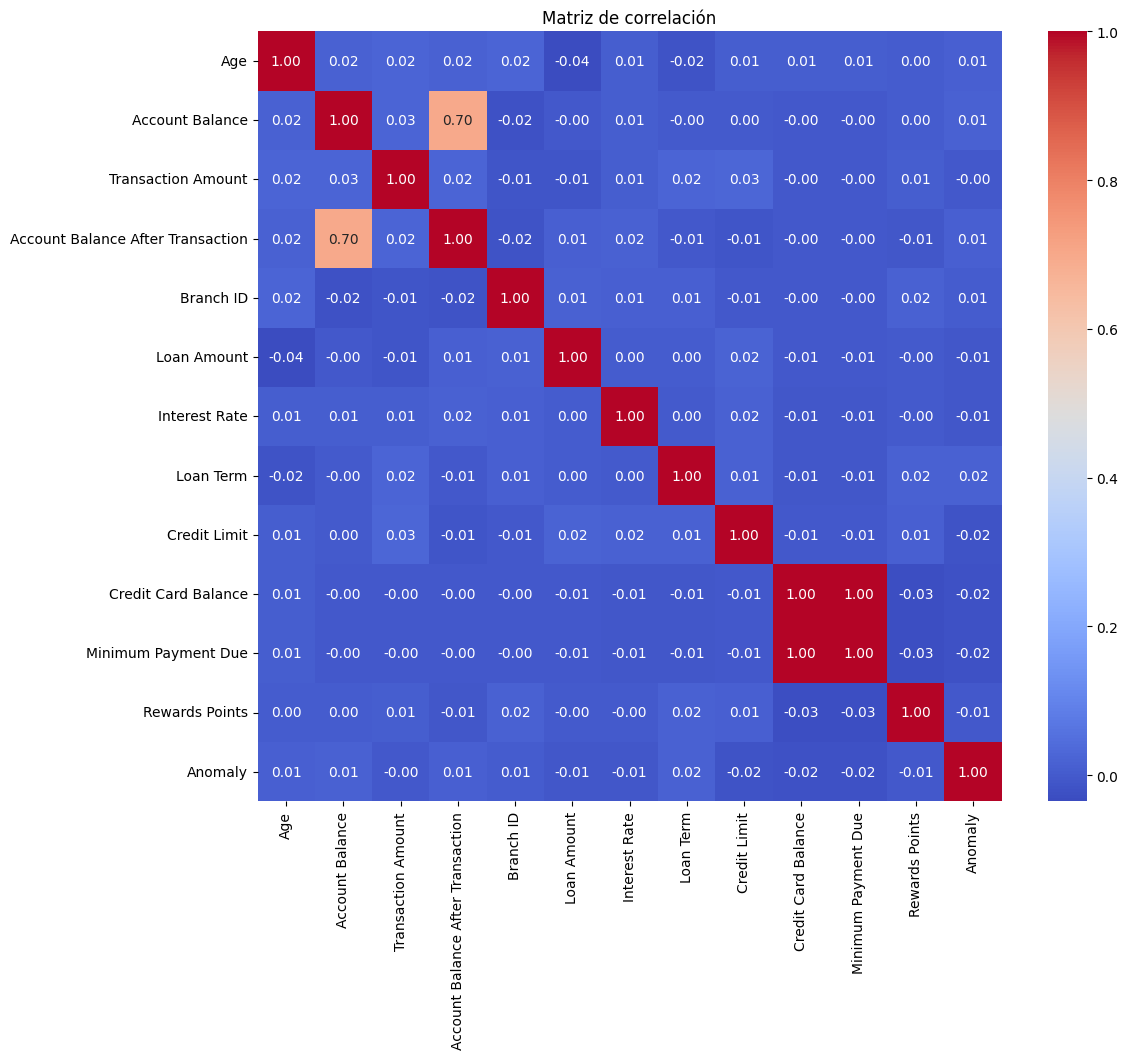

In [6]:
# Matriz de correlación (solo numéricas)
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Matriz de correlación")
plt.show()


Se observa una alta correlación positiva (r = 0.70) entre `Account Balance` y `Account Balance After Transaction`, lo cual es esperable ya que ambas están estrechamente relacionadas con el estado de la cuenta después de una transacción.
No hay correlaciones fuertes entre `Anomaly` (fraude) y ninguna de las variables numéricas. Esto sugiere que la detección de fraude no puede basarse únicamente en relaciones lineales simples.
Esta ausencia de correlación directa con `Anomaly` indica que será necesario utilizar modelos no lineales o hacer ingeniería de características más sofisticada para detectar patrones de fraude ocultos.

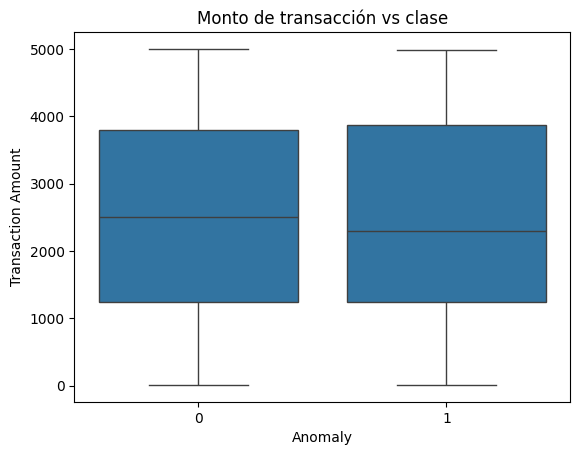

In [7]:
# Boxplot por clase: Transaction Amount
sns.boxplot(x='Anomaly', y='Transaction Amount', data=df)
plt.title("Monto de transacción vs clase")
plt.show()


Ambas distribuciones son similares, lo cual sugiere que el monto por sí solo no discrimina claramente entre fraude y no fraude.

Se observan transacciones fraudulentas en todo el rango de montos, no solo en los más altos, lo cual refuerza la idea de que la relación entre el monto y el fraude no es lineal ni evidente

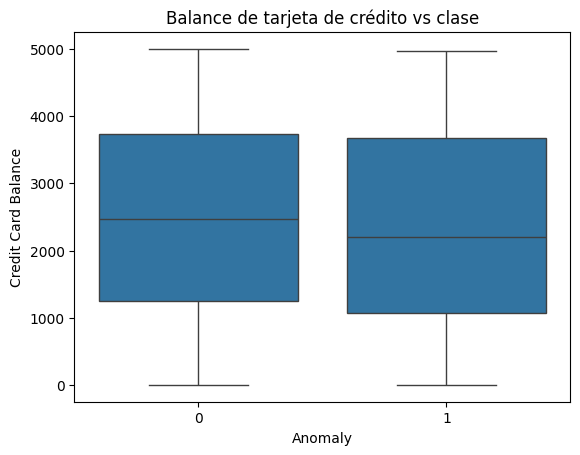

In [8]:
# Boxplot por clase: Credit Card Balance
sns.boxplot(x='Anomaly', y='Credit Card Balance', data=df)
plt.title("Balance de tarjeta de crédito vs clase")
plt.show()


Ambas clases presentan distribuciones muy similares en términos de rango, mediana y dispersión.

La amplia superposición indica que esta variable no permite distinguir visualmente entre fraude y no fraude

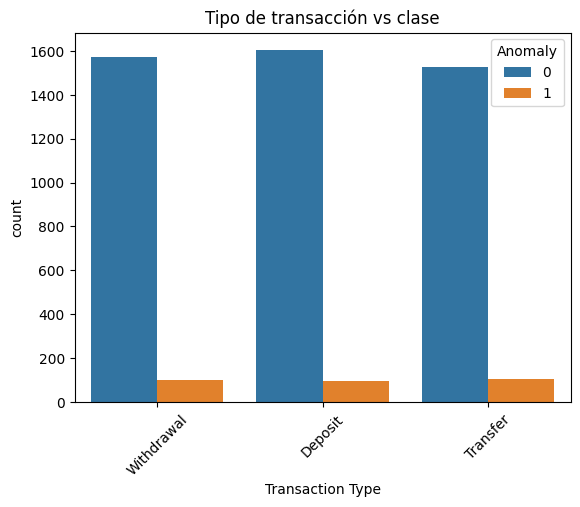

In [9]:
# Countplot por tipo de transacción
sns.countplot(x='Transaction Type', hue='Anomaly', data=df)
plt.title("Tipo de transacción vs clase")
plt.xticks(rotation=45)
plt.show()


La distribución de fraude (clase 1) se mantiene bastante similar en los tres tipos de transacción.

En todos los casos, la cantidad de transacciones normales (clase 0) supera ampliamente a las fraudulentas, lo cual es consistente con el desbalance de clases observado globalmente.

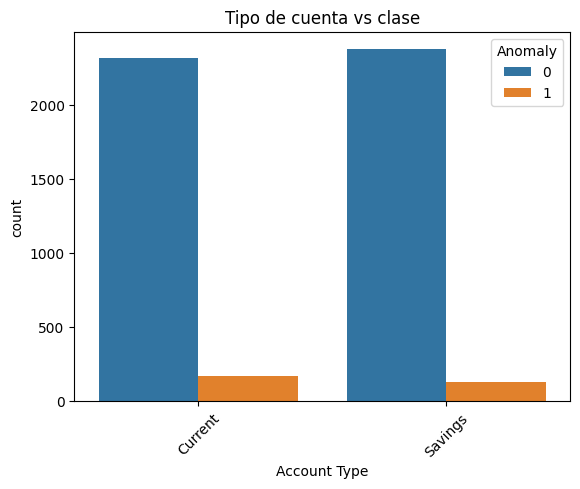

In [10]:
# Countplot por tipo de cuenta
sns.countplot(x='Account Type', hue='Anomaly', data=df)
plt.title("Tipo de cuenta vs clase")
plt.xticks(rotation=45)
plt.show()


Ambos tipos de cuenta tienen una proporción similar de transacciones normales (`Anomaly = 0`) y fraudulentas (`Anomaly = 1`).

No se observa una diferencia notable en la frecuencia de fraudes entre cuentas `Current` y `Savings`